In [5]:
!tar -xvzf /content/101_ObjectCategories.tar.gz -C /content/

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
101_ObjectCategories/chair/image_0005.jpg
101_ObjectCategories/chair/image_0006.jpg
101_ObjectCategories/chair/image_0007.jpg
101_ObjectCategories/chair/image_0008.jpg
101_ObjectCategories/chair/image_0010.jpg
101_ObjectCategories/chair/image_0011.jpg
101_ObjectCategories/chair/image_0012.jpg
101_ObjectCategories/chair/image_0013.jpg
101_ObjectCategories/chair/image_0014.jpg
101_ObjectCategories/chair/image_0016.jpg
101_ObjectCategories/chair/image_0017.jpg
101_ObjectCategories/chair/image_0018.jpg
101_ObjectCategories/chair/image_0019.jpg
101_ObjectCategories/chair/image_0020.jpg
101_ObjectCategories/chair/image_0022.jpg
101_ObjectCategories/chair/image_0023.jpg
101_ObjectCategories/chair/image_0024.jpg
101_ObjectCategories/chair/image_0025.jpg
101_ObjectCategories/chair/image_0026.jpg
101_ObjectCategories/chair/image_0028.jpg
101_ObjectCategories/chair/image_0029.jpg
101_ObjectCategories/chair/image_0030.jp

In [ ]:
import os

#Nommage dir
data_dir = '/content/101_ObjectCategories'

#Lister le contenu
if os.path.exists(data_dir):
    #Liste des classes (sous-dossiers)
    classes = os.listdir(data_dir)
    print("Classes trouvées :", classes)

    #Contenu sous dossier
    print("\nContenu de chaque classe :")
    for flower_class in classes:
        class_path = os.path.join(data_dir, flower_class)
        if os.path.isdir(class_path):
            print(f"- {flower_class}:")
            try:
                class_contents = os.listdir(class_path)
                if class_contents:
                    for item in class_contents:
                        print(f"  - {item}")
                else:
                    print("    (Le sous-dossier est vide)")
            except Exception as e:
                print(f"    (Erreur lors de la lecture du sous-dossier : {e})")
else:
    print(f"Le répertoire '{data_dir}' n'a pas été trouvé.")

In [ ]:
!tar -xvf /content/Annotations.tar -C /content/

## Excercice 1 - Question 1

In [11]:
from collections import Counter

classes = os.listdir(data_dir)
#Décompte du nombre image par classe via boucle

class_counts = {}

for cls in classes:
  cls_path = os.path.join(data_dir, cls)
  if os.path.isdir(cls_path):
    nb_images = len(os.listdir(cls_path))
    class_counts[cls] = nb_images


for cls, count in sorted(class_counts.items(), key=lambda x: x[1], reverse=True):
    print(f"{cls}: {count} images")

airplanes: 800 images
Motorbikes: 798 images
BACKGROUND_Google: 468 images
Faces_easy: 435 images
Faces: 435 images
watch: 239 images
Leopards: 200 images
bonsai: 128 images
car_side: 123 images
ketch: 114 images
chandelier: 107 images
hawksbill: 100 images
grand_piano: 99 images
brain: 98 images
butterfly: 91 images
helicopter: 88 images
menorah: 87 images
kangaroo: 86 images
starfish: 86 images
trilobite: 86 images
buddha: 85 images
sunflower: 85 images
ewer: 85 images
scorpion: 84 images
revolver: 82 images
laptop: 81 images
ibis: 80 images
llama: 78 images
minaret: 76 images
electric_guitar: 75 images
umbrella: 75 images
crab: 73 images
crayfish: 70 images
cougar_face: 69 images
dragonfly: 68 images
ferry: 67 images
dalmatian: 67 images
flamingo: 67 images
lotus: 66 images
dolphin: 65 images
stop_sign: 64 images
soccer_ball: 64 images
euphonium: 64 images
joshua_tree: 64 images
elephant: 64 images
schooner: 63 images
chair: 62 images
lamp: 61 images
yin_yang: 60 images
stegosaurus:

#Exercice 1 - Question 2

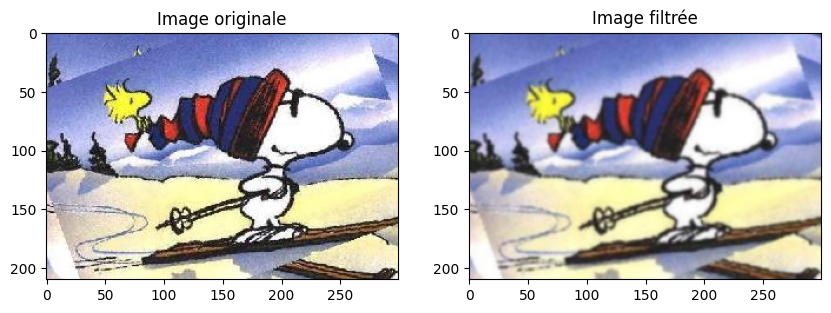

In [13]:
import cv2
import matplotlib.pyplot as plt

#Chargement image snoopy et transformation RGB
image_path = "/content/101_ObjectCategories/snoopy/image_0001.jpg"
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)


#Filtrage Gaussian
img_gaussian = cv2.GaussianBlur(image_rgb, (5, 5), 0)


plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title('Image originale')


plt.subplot(1, 2, 2)
plt.imshow(img_gaussian)
plt.title('Image filtrée Gaussian')
plt.show()

## Exercice 1 - Question 3

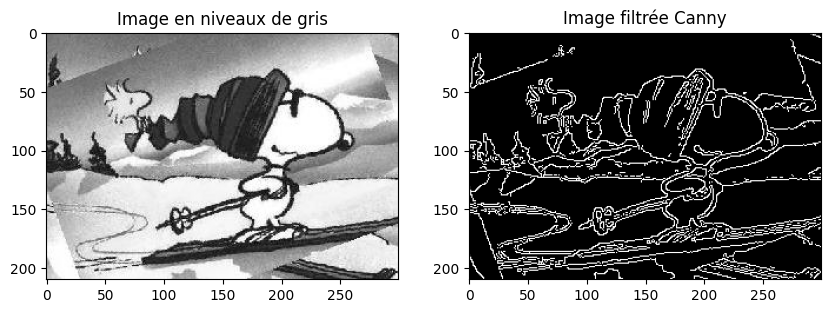

In [15]:
#Chargement image en gris pour appliquer l'algo de Canny
image_gris = cv2.imread(image_path,0)

#Filtrage Canny
canny_image = cv2.Canny(image_gris, 100, 200)


#Visualisation

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image_gris, cmap='gray')
plt.title('Image en niveaux de gris')


plt.subplot(1, 2, 2)
plt.imshow(canny_image, cmap='gray')
plt.title('Image filtrée Canny')
plt.show()

# Partie 2

## Exercice 2 - Question 1

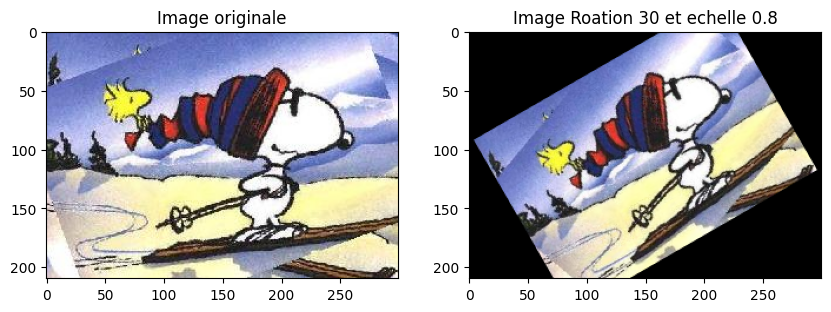

In [19]:
import numpy as np

#Obtenir la taille de l'image

(h, w) = image.shape[:2]

#Centrage de l'immage + angle 30 degrès + echelle à 0.8
centre = (w // 2, h // 2)

angle = 30

echelle = 0.8

#Matrice de rotation
M = cv2.getRotationMatrix2D(centre, angle, echelle)
image_rotation = cv2.warpAffine(image_rgb, M, (w, h))



#Visualisation
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title('Image originale')


plt.subplot(1, 2, 2)
plt.imshow(image_rotation)
plt.title('Image Roation 30 et echelle 0.8')
plt.show()

## Exercice 2 - Question 2

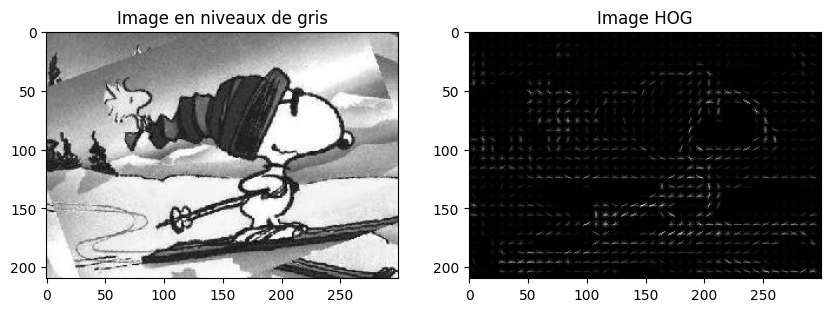

In [20]:
from skimage.feature import hog
from skimage import color

#Application detecteur HOG
features, hog_image = hog(image_gris,visualize=True)

#Visualisation
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image_gris, cmap='gray')
plt.title('Image en niveaux de gris')


plt.subplot(1, 2, 2)
plt.imshow(hog_image, cmap='gray')
plt.title('Image HOG')
plt.show()

## Exercice 2 - Question 3

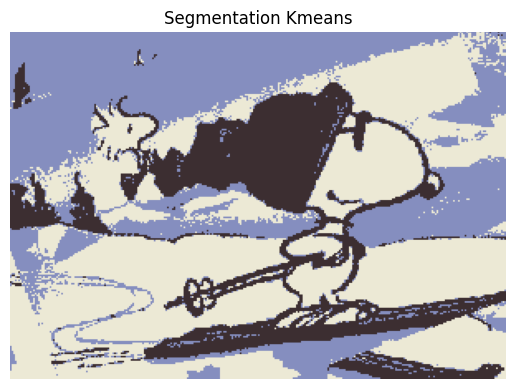

In [25]:
#Pretraitement pour Kmeans

Z = image.reshape((-1,3))

Z = np.float32(Z)


#Application KMEANS

criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = 3
ret,label,center=cv2.kmeans(Z,K,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)

center = np.uint8(center)
res = center[label.flatten()]
image_kmeans = res.reshape((image.shape))


plt.imshow(cv2.cvtColor(image_kmeans, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('Segmentation Kmeans')
plt.show()

# Partie 3

## Exercice 3 - Question 1

In [37]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator


#Pretraitement taille + normalisation
image_size = (128,128)
batch_size = 32

datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_data = datagen.flow_from_directory(
    data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

validation_data = datagen.flow_from_directory(
    data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

Found 7356 images belonging to 102 classes.
Found 1788 images belonging to 102 classes.


In [40]:
#Modele CNN

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(train_data.num_classes, activation='softmax')
])


#Compilation
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 102)            │        13,158 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,317,798 (12.66 MB)

 Trainable params: 3,317,798 (12.66 MB)

 Non-trainable params: 0 (0.00 B)

In [31]:
#Entrainement du modèle
model.fit(train_data, epochs=10, validation_data=validation_data)

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


230/230 ━━━━━━━━━━━━━━━━━━━━ 239s 1s/step - accuracy: 0.1741 - loss: 4.0529 - val_accuracy: 0.3613 - val_loss: 3.0666
Epoch 2/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 229s 993ms/step - accuracy: 0.3526 - loss: 3.0083 - val_accuracy: 0.4144 - val_loss: 2.5856
Epoch 3/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 224s 972ms/step - accuracy: 0.4158 - loss: 2.6109 - val_accuracy: 0.4564 - val_loss: 2.3833
Epoch 4/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 229s 998ms/step - accuracy: 0.4781 - loss: 2.2221 - val_accuracy: 0.5201 - val_loss: 2.1061
Epoch 5/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 223s 968ms/step - accuracy: 0.5243 - loss: 1.9540 - val_accuracy: 0.5386 - val_loss: 2.0040
Epoch 6/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 269s 999ms/step - accuracy: 0.5681 - loss: 1.6831 - val_accuracy: 0.5425 - val_loss: 1.9485
Epoch 7/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 230s 1s/step - accuracy: 0.6140 - loss: 1.4447 - val_accuracy: 0.5654 - val_loss: 1.8867
Epoch 8/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 234s 1s/step - accuracy: 0.6592 - loss: 1.2494 - val_

In [32]:
#Performance

val_loss, val_acc = model.evaluate(validation_data)
print(f"Validation accuracy: {val_acc}")
print(f"Validation loss: {val_loss}")

56/56 ━━━━━━━━━━━━━━━━━━━━ 17s 312ms/step - accuracy: 0.5796 - loss: 1.9412
Validation accuracy: 0.5732662081718445
Validation loss: 1.9766384363174438


## Excercice 3  - Question 2

In [37]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score


#Creation des listes pour stocker les variables + boucle pour parcourir les dossiers
X, y = [], []

for idx, cls in enumerate(classes):
  class_path = os.path.join(data_dir, cls)
  for img_name in os.listdir(class_path)[:100]:
    img_path = os.path.join(class_path, img_name)
    img = cv2.imread(img_path)
    img = cv2.resize(img, (128, 128))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    features = hog(img, pixels_per_cell=(8,8), cells_per_block=(2,2), feature_vector=True)
    X.append(features)
    y.append(idx)

X= np.array(X)
y = np.array(y)

#Seperation des données et application SVM

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = SVC(kernel='linear')
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)


#Evaluation des performances
accuracy = accuracy_score(y_test, y_pred)
print(f"Précision du modèle SVM: {accuracy}")
print(classification_report(y_test, y_pred, target_names=classes))

Précision du modèle SVM: 0.534375
                   precision    recall  f1-score   support

            panda       1.00      0.10      0.18        10
        sea_horse       0.00      0.00      0.00        16
             lamp       0.58      0.54      0.56        13
      stegosaurus       0.69      0.69      0.69        13
            pizza       0.56      0.53      0.55        17
         yin_yang       0.70      0.50      0.58        14
        cellphone       0.79      0.92      0.85        12
            ferry       0.48      0.59      0.53        17
         hedgehog       0.25      0.33      0.29        12
        crocodile       0.07      0.08      0.07        12
        stop_sign       0.83      0.77      0.80        13
           mayfly       0.40      0.25      0.31         8
           cannon       0.67      0.29      0.40         7
   crocodile_head       0.36      0.29      0.32        14
              emu       0.18      0.36      0.24        11
      soccer_ball    

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## Excercice 3 - Questions 3

In [38]:
#Augmentation des données

image_size = (128,128)
batch_size = 32

datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split = 0.2,
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range = 0.1,
    horizontal_flip=True,
    brightness_range=[0.8, 1.2]
)


train_data2 = datagen.flow_from_directory(
    data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

validation_data2 = datagen.flow_from_directory(
    data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)


Found 7356 images belonging to 102 classes.
Found 1788 images belonging to 102 classes.


In [41]:
#Entrainement modele augmenté
history = model.fit(train_data2, epochs=15, validation_data=validation_data2)

Epoch 1/15
230/230 ━━━━━━━━━━━━━━━━━━━━ 280s 1s/step - accuracy: 0.0957 - loss: 4.3315 - val_accuracy: 0.2489 - val_loss: 3.5459
Epoch 2/15
230/230 ━━━━━━━━━━━━━━━━━━━━ 271s 1s/step - accuracy: 0.2466 - loss: 3.6272 - val_accuracy: 0.3171 - val_loss: 3.2273
Epoch 3/15
230/230 ━━━━━━━━━━━━━━━━━━━━ 282s 1s/step - accuracy: 0.2863 - loss: 3.3286 - val_accuracy: 0.3356 - val_loss: 3.0733
Epoch 4/15
230/230 ━━━━━━━━━━━━━━━━━━━━ 267s 1s/step - accuracy: 0.3270 - loss: 3.1029 - val_accuracy: 0.3658 - val_loss: 2.8782
Epoch 5/15
230/230 ━━━━━━━━━━━━━━━━━━━━ 262s 1s/step - accuracy: 0.3449 - loss: 2.9730 - val_accuracy: 0.3865 - val_loss: 2.6752
Epoch 6/15
230/230 ━━━━━━━━━━━━━━━━━━━━ 282s 1s/step - accuracy: 0.3678 - loss: 2.8364 - val_accuracy: 0.4116 - val_loss: 2.5810
Epoch 7/15
230/230 ━━━━━━━━━━━━━━━━━━━━ 267s 1s/step - accuracy: 0.3809 - loss: 2.7111 - val_accuracy: 0.4133 - val_loss: 2.5594
Epoch 8/15
230/230 ━━━━━━━━━━━━━━━━━━━━ 265s 1s/step - accuracy: 0.3807 - loss: 2.6883 - val_accu

In [48]:
#Performance

val_loss, val_acc = model.evaluate(validation_data2)
print(f"Validation accuracy augmenté: {val_acc}")
print(f"Validation loss augmenté: {val_loss}")

56/56 ━━━━━━━━━━━━━━━━━━━━ 24s 426ms/step - accuracy: 0.5142 - loss: 2.1216
Validation accuracy augmenté: 0.5123042464256287
Validation loss augmenté: 2.1329774856567383


# Partie 3

## Excercice 3 - Question 1

In [ ]:
#Installation de Yolov5

!git clone https://github.com/ultralytics/yolov5
%cd yolov5
!pip install -r requirements.txt

In [1]:
import torch

yolo_model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

/usr/local/lib/python3.11/dist-packages/torch/hub.py:330: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  warnings.warn(
Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


YOLOv5 🚀 2025-6-13 Python-3.11.13 torch-2.6.0+cu124 CPU

100%|██████████| 14.1M/14.1M [00:00<00:00, 117MB/s]

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


{'image_0001.jpg'}


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
image 1/1: 300x223 (no detections)
Speed: 7.0ms pre-process, 773.4ms inference, 1.4ms NMS per image at shape (1, 3, 640, 480)


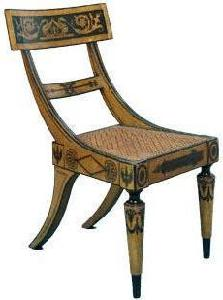

/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


{'image_0002.jpg'}


image 1/1: 300x200 (no detections)
Speed: 10.9ms pre-process, 468.6ms inference, 1.5ms NMS per image at shape (1, 3, 640, 448)


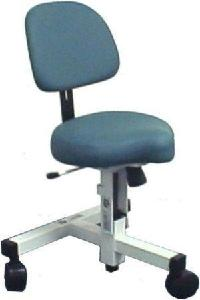

/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


{'image_0003.jpg'}


image 1/1: 300x230 1 chair
Speed: 6.3ms pre-process, 600.1ms inference, 3.5ms NMS per image at shape (1, 3, 640, 512)


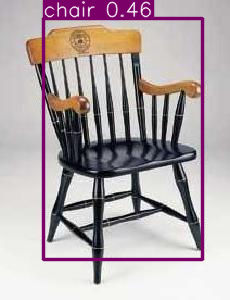

/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


{'image_0004.jpg'}


image 1/1: 300x198 (no detections)
Speed: 7.5ms pre-process, 398.3ms inference, 1.0ms NMS per image at shape (1, 3, 640, 448)


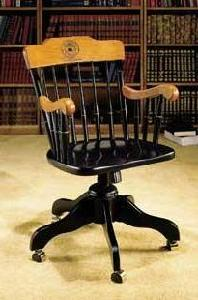

/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


{'image_0005.jpg'}


image 1/1: 300x250 (no detections)
Speed: 6.9ms pre-process, 328.4ms inference, 1.0ms NMS per image at shape (1, 3, 640, 544)


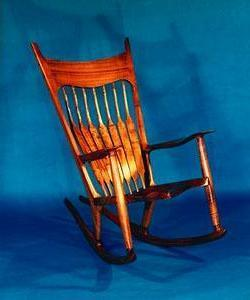

/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


{'image_0006.jpg'}


image 1/1: 276x300 1 chair, 1 potted plant, 2 books
Speed: 7.3ms pre-process, 382.4ms inference, 1.3ms NMS per image at shape (1, 3, 608, 640)


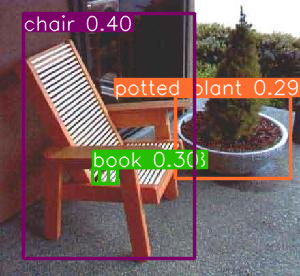

/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


{'image_0007.jpg'}


image 1/1: 300x199 1 airplane, 1 surfboard
Speed: 6.1ms pre-process, 297.6ms inference, 1.2ms NMS per image at shape (1, 3, 640, 448)


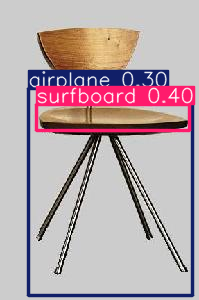

/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


{'image_0008.jpg'}


image 1/1: 300x239 (no detections)
Speed: 13.5ms pre-process, 324.5ms inference, 1.3ms NMS per image at shape (1, 3, 640, 512)


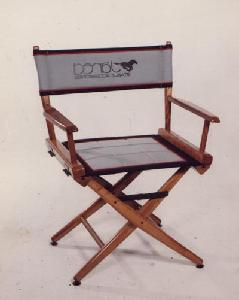

/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


{'image_0009.jpg'}


image 1/1: 300x203 1 bed
Speed: 5.5ms pre-process, 300.3ms inference, 1.3ms NMS per image at shape (1, 3, 640, 448)


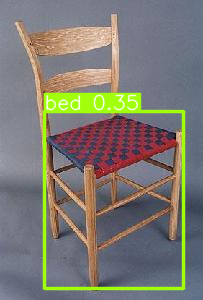

/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


{'image_0010.jpg'}


image 1/1: 300x198 (no detections)
Speed: 5.4ms pre-process, 290.4ms inference, 1.0ms NMS per image at shape (1, 3, 640, 448)


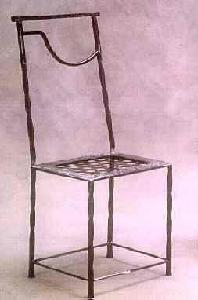

/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


{'image_0011.jpg'}


image 1/1: 300x198 (no detections)
Speed: 6.5ms pre-process, 290.0ms inference, 0.9ms NMS per image at shape (1, 3, 640, 448)


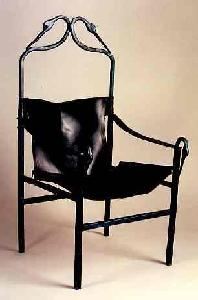

/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


{'image_0012.jpg'}


image 1/1: 300x204 1 chair, 1 bed
Speed: 7.7ms pre-process, 321.1ms inference, 1.2ms NMS per image at shape (1, 3, 640, 448)


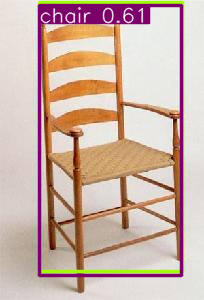

/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


{'image_0013.jpg'}


image 1/1: 300x255 1 suitcase
Speed: 6.3ms pre-process, 345.9ms inference, 1.3ms NMS per image at shape (1, 3, 640, 544)


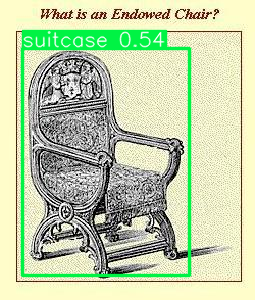

/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


{'image_0014.jpg'}


image 1/1: 300x300 1 traffic light
Speed: 6.6ms pre-process, 404.0ms inference, 1.4ms NMS per image at shape (1, 3, 640, 640)


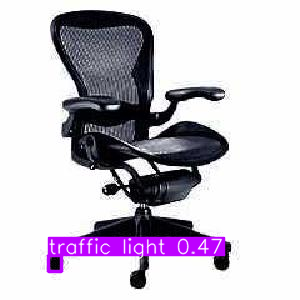

/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


{'image_0015.jpg'}


image 1/1: 300x193 (no detections)
Speed: 7.6ms pre-process, 296.1ms inference, 0.9ms NMS per image at shape (1, 3, 640, 416)


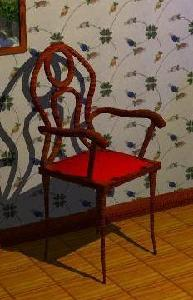

In [47]:
from IPython.display import Image
import os

dossier_path = f"/content/101_ObjectCategories/chair"


#Liste image du sous dossier
image_files = sorted([f for f in os.listdir(dossier_path) if f.endswith('.jpg')])

#Boucle sur une dizaine d'image

for image_name in image_files[:15]:
  image_path = os.path.join(dossier_path, image_name)
  print({image_name})
  results = yolo_model(image_path)
  results.print()
  results.show()

/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
image 1/1: 276x300 1 chair, 1 potted plant, 2 books
Speed: 13.1ms pre-process, 564.0ms inference, 2.4ms NMS per image at shape (1, 3, 608, 640)


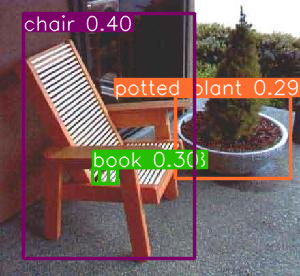

In [45]:
image_path = "/content/101_ObjectCategories/chair/image_0006.jpg"

#Prediction détection objet sur l'image

resultat = yolo_model(image_path)

resultat.print()
resultat.show()